In [3]:
import h5py

dataset_folder = '../../../../Datasets/'
test_file = h5py.File(dataset_folder + '3D_unique/3D_test.h5', 'r')
predictions = h5py.File(
    dataset_folder + '3D_unique/3D_test_predictions.h5', 'r')


In [4]:
test_file['X'].shape


(276, 512, 512)

In [5]:
import numpy as np

test_file['y'].shape
pred = np.squeeze(predictions['predictions'])


In [6]:
def plot_images(images, labels, start_index, n_images, figsize=(5, 5)):
    if len(images) != len(labels):
        raise Exception(
            'The image array should be the same len of the labels array')
    f, axarr = plt.subplots(len(images), n_images, figsize=figsize)
    for i, image in enumerate(images):
        for k in range(n_images):
            if n_images > 1:
                axarr[i, k].imshow(image[start_index + k])
                axarr[i, k].set_title(labels[i])
            else:
                axarr[i].imshow(image[start_index + k])
                axarr[i].set_title(labels[i])
    plt.tight_layout()
    plt.show()


In [7]:
pred_binary = pred.copy()

pred_binary[pred >= 1] = 1
pred_binary[pred < 1] = 0


In [8]:
indexes_no_spots = np.arange(test_file['y'].shape[0])
no_spots_masks = [np.all(x == False) for x in test_file['y']]
indexes_no_spots = indexes_no_spots[no_spots_masks]

no_spots_x = test_file['X'][indexes_no_spots]
no_spots_y = test_file['y'][indexes_no_spots]
no_spots_pred = pred[indexes_no_spots]
no_spots_binary = pred_binary[indexes_no_spots]


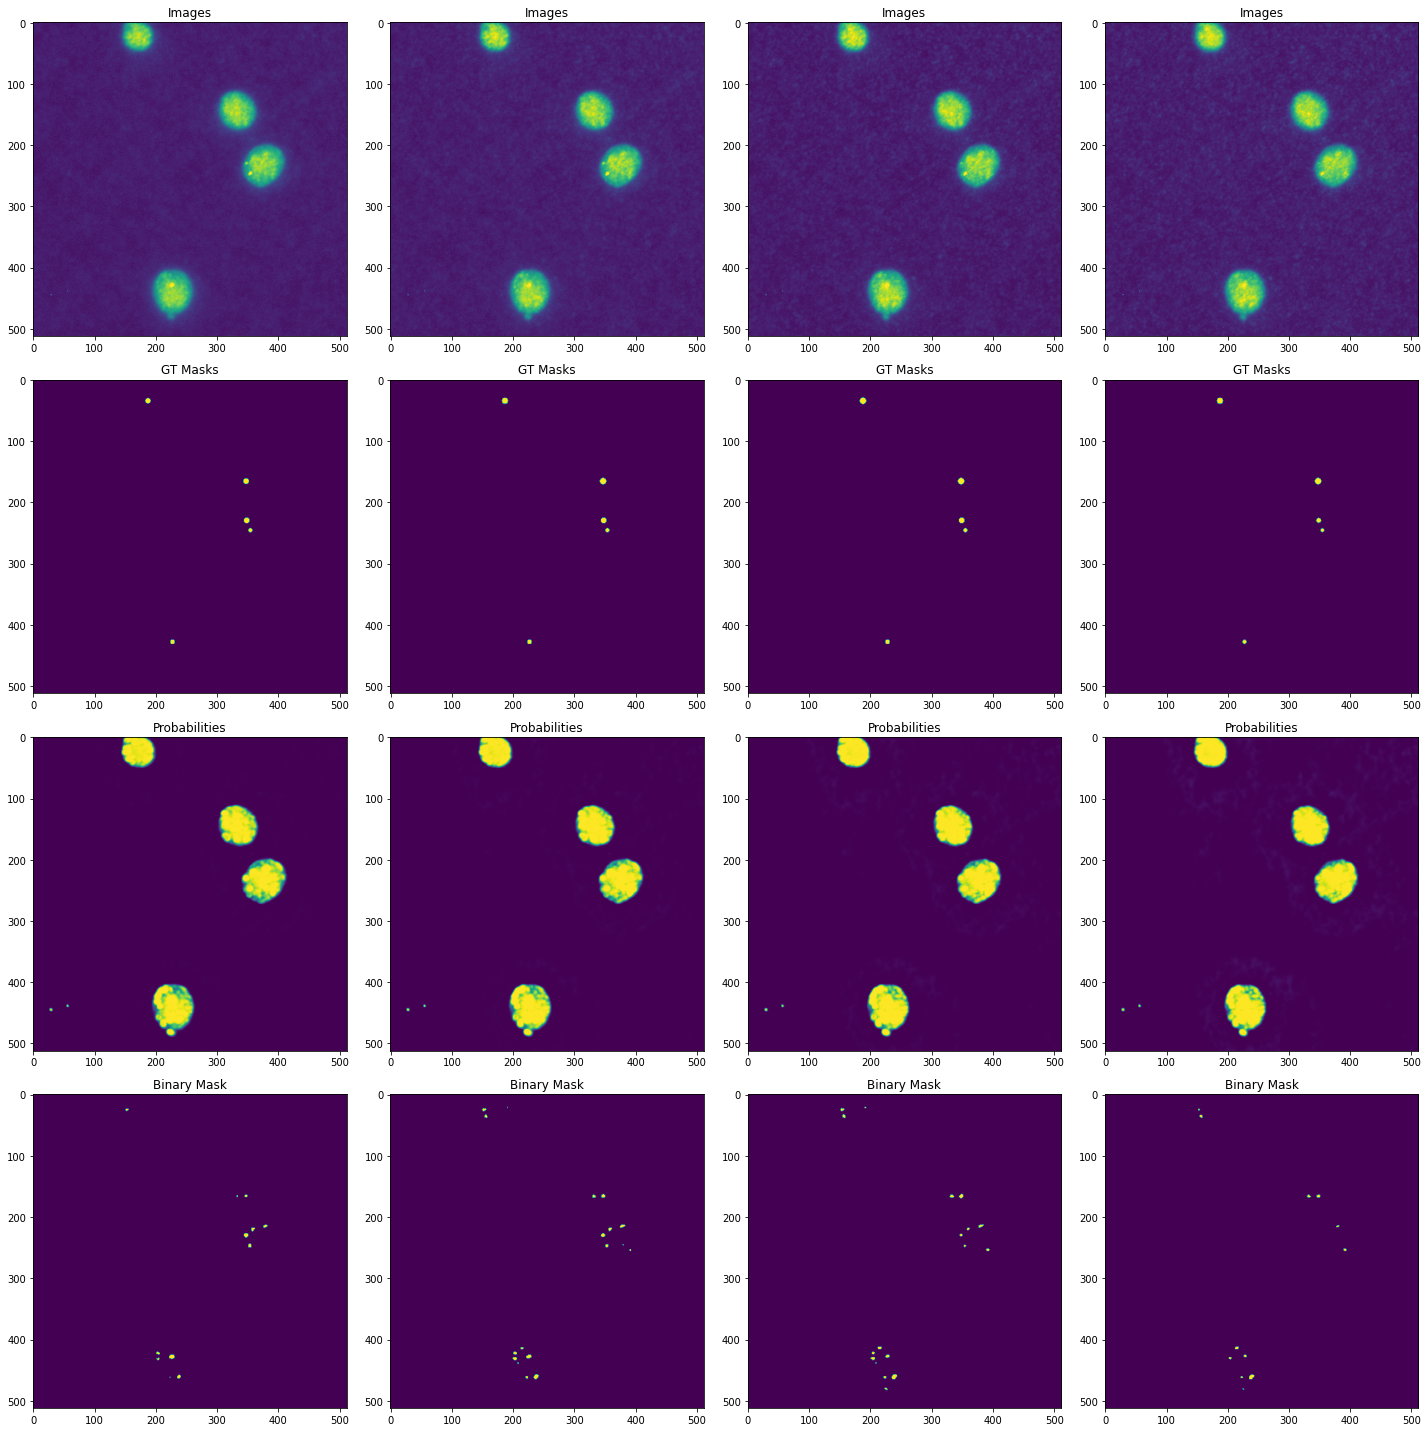

In [9]:
import matplotlib.pyplot as plt

images = [test_file['X'], test_file['y'], pred, pred_binary]
labels = ['Images', 'GT Masks', 'Probabilities', 'Binary Mask']

# images = [no_spots_x, no_spots_y, no_spots_pred, no_spots_binary]
# labels = ['Images', 'GT Masks', 'Probabilities', 'Binary Mask']

plot_images(images=images, labels=labels,
            start_index=20, n_images=4, figsize=(20, 20))
